# Mawrth_Vallis

In this series of note(book)s we are going to review the library using Mars Mawrth Vallis (https://en.wikipedia.org/wiki/Mawrth_Vallis) as instrument-data.

Mawrth Vallis (_MMV_ hereafter) is centered at (approx) 22.5<sup>o</sup>,343.5<sup>o</sup> (lat,lon; C180+E).
Let's define the region of interest as a box of **2** degrees sides around those coordinates:

In [1]:
bbox = {
    'minlat': 21.5,
    'maxlat': 23.5,
    'westlon': 342.5-360,
    'eastlon': 344.5-360
}

## Data query

The we are eventually going to download comes from USGS/PDS; to know where the data is available for download (ie, URL),
we query USGS' ODE (https://ode.rsl.wustl.edu/) servers.
All those quirks -- query, retrieve, select, etc. -- are implemented in the lib.

First thing we do is to query what are the datasets the (NPT) lib supports; And then we go query for them products.

In [2]:
import npt

npt.datasets.list()

['mars/mex/hrsc/rdrv3',
 'mars/mex/hrsc/refdr3',
 'mars/mro/ctx/edr',
 'mars/mro/hirise/rdrv11']

### CTX

In [3]:
query_results_ctx = npt.search.ode(dataset='mars/mro/ctx/edr', bbox=bbox, match='intersect')

https://oderest.rsl.wustl.edu/live2/?query=product&results=fmpc&output=JSON&loc=f&minlat=21.5&maxlat=23.5&westlon=342.5&eastlon=344.5&target=mars&ihid=mro&iid=ctx&pt=edr
75 products found


In [4]:
query_results_ctx.sample(5)

,id,mission,inst,type,Target_name,Footprints_cross_meridian,Map_scale,Center_latitude,Center_longitude,Easternmost_longitude,...,Phase_angle,Solar_longitude,Observation_time,Product_creation_time,UTC_start_time,UTC_stop_time,geometry,image_url,label_url,browse_url
12,P18_008179_2034_XI_23N017W,MRO,CTX,EDR,MARS,False,6.35,23.3384,342.3763,342.73,...,24.92,63.11,2008-04-24T19:09:00.499,2008-10-09T17:51:30.000,2008-04-24T19:08:50.890,2008-04-24T19:09:10.108,"POLYGON ((-17.39000 23.87860, -17.27000 22.856...",https://pds-imaging.jpl.nasa.gov/data/mro/mars...,None,None
15,B02_010394_2026_XI_22N016W,MRO,CTX,EDR,MARS,False,5.63,22.3779,343.2509,343.83,...,48.37,141.66,2008-10-14T09:52:46.553,2009-04-27T21:24:02.000,2008-10-14T09:51:57.547,2008-10-14T09:53:35.559,"POLYGON ((-16.82000 25.00980, -16.17000 19.803...",https://pds-imaging.jpl.nasa.gov/data/mro/mars...,None,None
6,P14_006610_2034_XI_23N017W,MRO,CTX,EDR,MARS,False,5.66,23.2043,342.4057,342.71,...,42.6,7.34,2007-12-24T12:28:27.826,2008-07-01T01:39:51.000,2007-12-24T12:28:21.100,2007-12-24T12:28:34.552,"POLYGON ((-17.38000 23.59090, -17.29000 22.876...",https://pds-imaging.jpl.nasa.gov/data/mro/mars...,None,None
40,J05_046815_2055_XN_25N017W,MRO,CTX,EDR,MARS,False,5.67,25.269,342.573,343.08,...,57.21,190.11,2016-07-22T07:51:32.796,2016-12-06T22:51:14.000,2016-07-22T07:50:57.243,2016-07-22T07:52:08.349,"POLYGON ((-17.41000 27.18400, -16.92000 23.412...",https://pds-imaging.jpl.nasa.gov/data/mro/mars...,None,None
9,P16_007111_1997_XN_19N016W,MRO,CTX,EDR,MARS,False,5.69,19.4584,343.3997,344,...,45.89,25.88,2008-02-01T13:28:28.988,2008-07-17T01:36:15.000,2008-02-01T13:27:39.983,2008-02-01T13:29:17.994,"POLYGON ((-16.70000 22.08330, -16.00000 16.891...",https://pds-imaging.jpl.nasa.gov/data/mro/mars...,None,None


### HiRISE

In [5]:
query_results_hirise = npt.search.ode(dataset='mars/mro/hirise/rdrv11', bbox=bbox, match='intersect')

https://oderest.rsl.wustl.edu/live2/?query=product&results=fmpc&output=JSON&loc=f&minlat=21.5&maxlat=23.5&westlon=342.5&eastlon=344.5&target=mars&ihid=mro&iid=hirise&pt=rdrv11
43 products found


In [6]:
query_results_hirise.sample(5)

,id,mission,inst,type,Target_name,Footprints_cross_meridian,Map_scale,Center_latitude,Center_longitude,Easternmost_longitude,...,Phase_angle,Solar_longitude,Observation_time,Product_creation_time,UTC_start_time,UTC_stop_time,geometry,image_url,label_url,browse_url
16,ESP_040301_2025_RED,MRO,HIRISE,RDRV11,MARS,False,0.25,22.0356,342.74,342.811,...,39.959984,301.019803,2015-03-02T18:26:38.692,2015-03-11T05:46:53.000,2015-03-02T18:26:36.075,2015-03-02T18:26:41.310,"POLYGON ((-17.18900 21.90390, -17.30300 21.892...",https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...,https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...,https://hirise.lpl.arizona.edu/PDS/EXTRAS/RDR/...
2,PSP_007111_2020_RED,MRO,HIRISE,RDRV11,MARS,False,0.25,21.7167,343.0766,343.146,...,46.195603,25.87594,2008-02-01T13:29:11.567,2010-04-03T20:29:38.000,2008-02-01T13:29:09.094,2008-02-01T13:29:14.040,"POLYGON ((-16.85400 21.59330, -16.95700 21.581...",https://hirise.lpl.arizona.edu/PDS/RDR/PSP/ORB...,https://hirise.lpl.arizona.edu/PDS/RDR/PSP/ORB...,https://hirise.lpl.arizona.edu/PDS/EXTRAS/RDR/...
13,ESP_038626_2025_RED,MRO,HIRISE,RDRV11,MARS,False,0.5,22.1774,344.13,344.192,...,65.300548,219.505384,2014-10-23T06:25:00.451,2014-10-30T00:28:38.000,2014-10-23T06:24:58.184,2014-10-23T06:25:02.718,"POLYGON ((-15.80800 22.06380, -15.90000 22.053...",https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...,https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...,https://hirise.lpl.arizona.edu/PDS/EXTRAS/RDR/...
35,ESP_056863_2025_RED,MRO,HIRISE,RDRV11,MARS,False,0.5,22.1994,342.4111,342.52,...,64.129184,249.094173,2018-09-13T06:42:08.059,2018-09-20T10:42:41.000,2018-09-13T06:41:59.031,2018-09-13T06:42:17.087,"POLYGON ((-17.48000 21.72730, -17.57300 21.716...",https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...,https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...,https://hirise.lpl.arizona.edu/PDS/EXTRAS/RDR/...
11,ESP_032125_2025_RED,MRO,HIRISE,RDRV11,MARS,False,0.25,22.3983,342.8171,342.88,...,49.181345,329.66261,2013-06-03T17:03:43.927,2013-06-12T19:15:19.000,2013-06-03T17:03:41.635,2013-06-03T17:03:46.220,"POLYGON ((-17.12000 22.28380, -17.21300 22.273...",https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...,https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...,https://hirise.lpl.arizona.edu/PDS/EXTRAS/RDR/...


### HRSC

In [7]:
query_results_hrsc = npt.search.ode(dataset='mars/mex/hrsc/refdr3', bbox=bbox, match='intersect')

https://oderest.rsl.wustl.edu/live2/?query=product&results=fmpc&output=JSON&loc=f&minlat=21.5&maxlat=23.5&westlon=342.5&eastlon=344.5&target=mars&ihid=mex&iid=hrsc&pt=refdr3
13 products found


In [8]:
query_results_hrsc.sample(5)

,id,mission,inst,type,Target_name,Footprints_cross_meridian,Map_scale,Center_latitude,Center_longitude,Easternmost_longitude,...,Phase_angle,Solar_longitude,Observation_time,Product_creation_time,UTC_start_time,UTC_stop_time,geometry,image_url,label_url,browse_url
10,HA359_0000_ND3.JP2,MEX,HRSC,REFDR3,MARS,False,50,6.0099,343.0495,344.209,...,None,None,2012-02-17T04:21:32.941,2016-10-27T09:57:31.000,2012-02-17T04:17:12.415,2012-02-17T04:25:53.468,"POLYGON ((-17.22000 -10.29900, -17.22200 -10.0...",https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...
6,H5145_0000_ND3.JP2,MEX,HRSC,REFDR3,MARS,False,12.5,21.0479,344.6243,345.411,...,None,None,2008-01-03T20:53:51.580,2016-04-27T02:54:28.000,2008-01-03T20:52:54.081,2008-01-03T20:54:49.080,"POLYGON ((-14.58900 24.73500, -14.59000 24.654...",https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...
2,H1542_0009_ND3.JP2,MEX,HRSC,REFDR3,MARS,False,25,35.1866,342.9012,344.889,...,None,None,2005-03-30T13:07:00.848,2016-03-08T06:50:01.000,2005-03-30T13:01:22.853,2005-03-30T13:12:38.843,"POLYGON ((-16.34000 50.79600, -16.29600 50.290...",https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...
9,H5199_0000_ND3.JP2,MEX,HRSC,REFDR3,MARS,False,12.5,19.123,342.1325,342.76,...,None,None,2008-01-19T06:21:00.074,2016-04-27T02:54:28.000,2008-01-19T06:19:56.076,2008-01-19T06:22:04.073,"POLYGON ((-17.24000 23.29800, -17.24100 23.213...",https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...
5,H3308_0000_ND3.JP2,MEX,HRSC,REFDR3,MARS,False,12.5,20.942,344.3251,345.112,...,None,None,2006-08-06T22:47:48.110,2016-04-18T15:52:52.000,2006-08-06T22:46:03.614,2006-08-06T22:49:32.606,"POLYGON ((-15.03900 27.39500, -15.03700 27.271...",https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...


## Visualize footprints

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [40, 20]

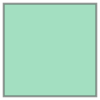

In [10]:
import shapely

bbox_polygon = shapely.geometry.box(
    bbox['westlon'], 
    bbox['minlat'], 
    bbox['eastlon'], 
    bbox['maxlat']
)

bbox_polygon

In [11]:
from pandas import concat
from geopandas import GeoDataFrame

gdf = GeoDataFrame(concat([
        query_results_hrsc,
        query_results_ctx,
        query_results_hirise,
    ],ignore_index=True))

In [12]:
def plot_geometries(gdf, ref_polygon=None, ref_label='Ref-Polygon'):
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots()

    polygon_lgd = None
    if ref_polygon:
        polygon_plt = ax.plot(*ref_polygon.exterior.xy, c='yellow')
        polygon_lgd = plt.legend(polygon_plt, [ref_label], loc=2)

    gdf.plot(alpha=0.5, edgecolor='red', column='inst',
             legend=True, legend_kwds={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}, 
             figsize=(24,16), ax=ax)

    if polygon_lgd:
        ax.add_artist(polygon_lgd)
        
    return ax

<AxesSubplot:>

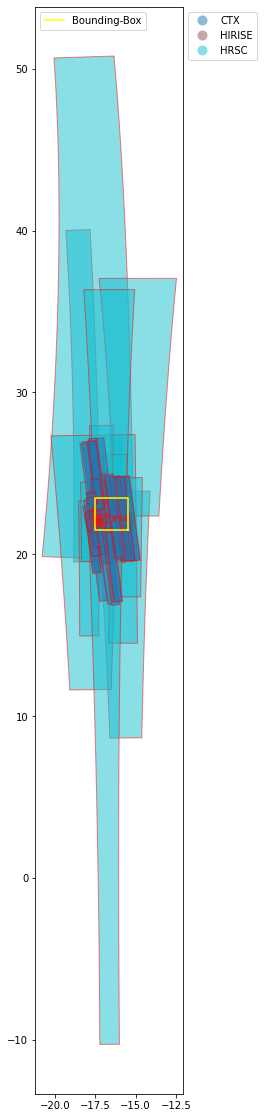

In [13]:
plot_geometries(gdf, bbox_polygon, 'Bounding-Box')

In [14]:
gdf.to_file('Mawrth_Vallis_ODE_products_intersect.geojson', driver='GeoJSON', index=False)

## Conclusion

We went through the selection of Mars image products -- more specifically, their footprints -- as provided by USGS/PDS/ODE' database. The whole of querying, filtering, selection, and metadata formating is implemented in NPT' `search` module.

Keypoints in the process (implemented in the internals of the library) are:

- ODE search interface understands geographical longitude coordinates in the range [0:360]. Accordingly, results (lon) coordinates are also in the same (0:360) range;
- Some footprints returned by ODE are of (shapely) formats *different from Polygon*: *GeometryCollection* or *MultiPolygon*. The reason is unknown to me, most probably some bug/lack of data validation in their pipeline.
  * NPT fixes that by "casting" those (wrong) geometries to their _envelope Polygon_;
- As in the example data here downloaded, some geometries do not properly represent the respective image (as you can see in the plot above): polygon is partially "empty". NPT does *not* fix those issues.

See the appendix section below for a summary of this notebook on retrieving on footprints *inside* the bounding-box.

## Appendix

### Selection of fully contained image products/footprints

In [15]:
query_results_ctx = npt.search.ode(dataset='mars/mro/ctx/edr', bbox=bbox, match='contain')
query_results_hirise = npt.search.ode(dataset='mars/mro/hirise/rdrv11', bbox=bbox, match='contain')
query_results_hrsc = npt.search.ode(dataset='mars/mex/hrsc/refdr3', bbox=bbox, match='contain')

gdf = GeoDataFrame(concat([
        query_results_hrsc,
        query_results_ctx,
        query_results_hirise,
    ],ignore_index=True))

https://oderest.rsl.wustl.edu/live2/?query=product&results=fmpc&output=JSON&loc=o&minlat=21.5&maxlat=23.5&westlon=342.5&eastlon=344.5&target=mars&ihid=mro&iid=ctx&pt=edr
3 products found
https://oderest.rsl.wustl.edu/live2/?query=product&results=fmpc&output=JSON&loc=o&minlat=21.5&maxlat=23.5&westlon=342.5&eastlon=344.5&target=mars&ihid=mro&iid=hirise&pt=rdrv11
26 products found
https://oderest.rsl.wustl.edu/live2/?query=product&results=fmpc&output=JSON&loc=o&minlat=21.5&maxlat=23.5&westlon=342.5&eastlon=344.5&target=mars&ihid=mex&iid=hrsc&pt=refdr3
0 products found


<AxesSubplot:>

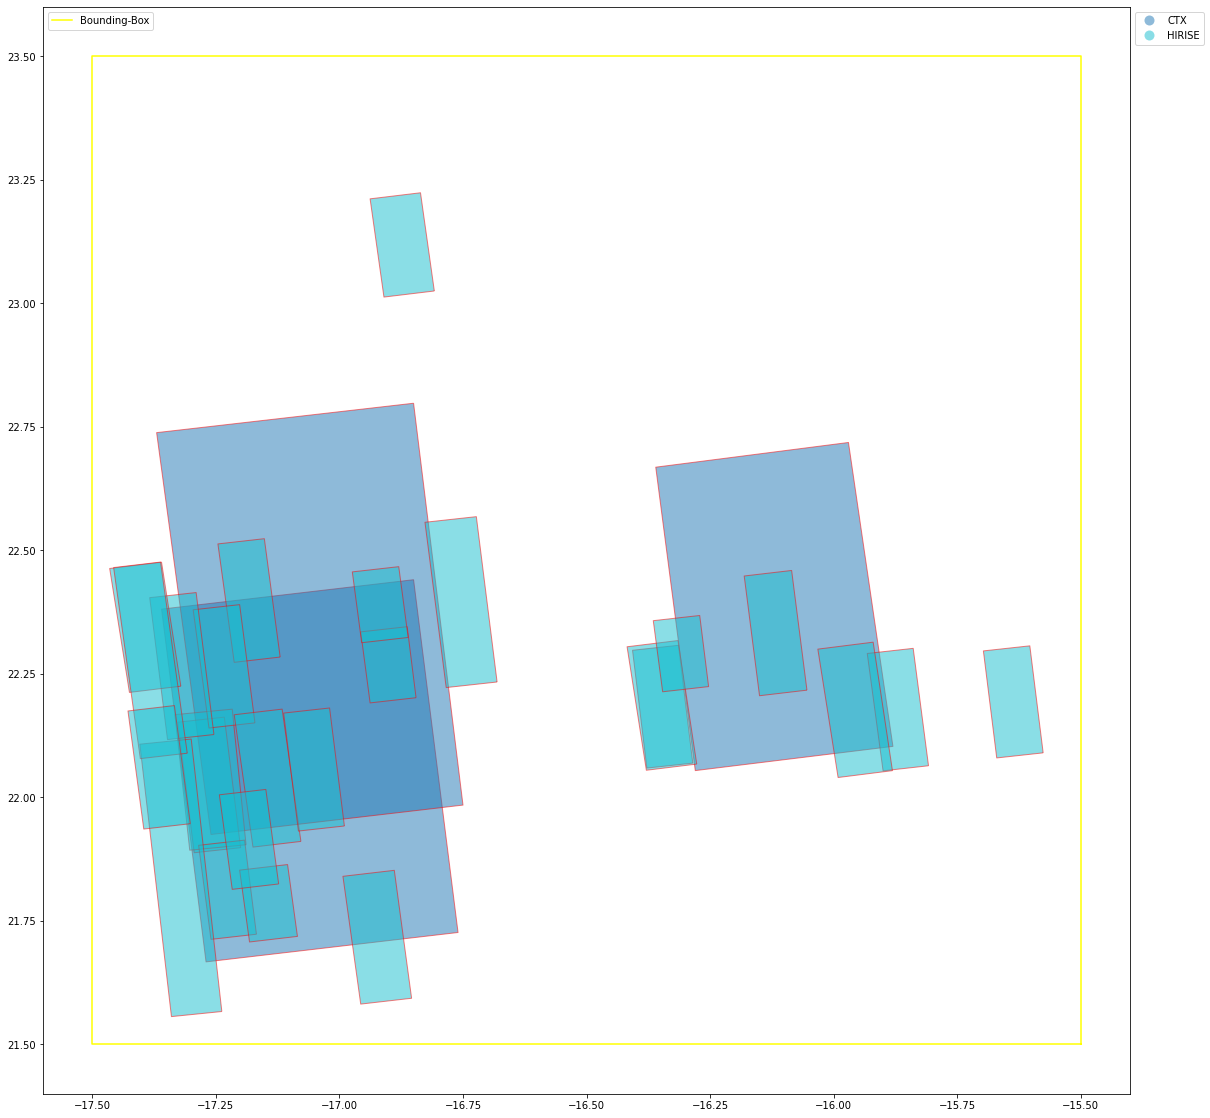

In [16]:
plot_geometries(gdf, bbox_polygon, 'Bounding-Box')

In [17]:
# gdf.to_file('Mawrth_Vallis_ODE_products_contain.geojson', driver='GeoJSON', index=False)